## inventory_select.ipynb

In [1]:
#  this program reads in the ghcd_inventory file
#  breaks it up into rows/fields
#  selects only the useful rows
#  then writes it back out as a csv

import csv
import pandas as pd

inputtext = "../../data/rawdata/inventory.txt"

with open(inputtext, "r") as text:
    contents = text.read()

# 

In [2]:
# break up the file contents into recognizeable records
begin = 0
end   = 46
lines = []

while begin < len(contents):
    lines.append(contents[begin: end])
    begin += 46
    end   += 46

    
print(lines[42])
print(len(lines))

AFM00040938  34.2100   62.2280 SNWD 1982 2019

613006


In [3]:
# now, break up the lines into fields, with which we will form a dataframe

ID = []
Latitude = []
Longitude = []
Element = []
Firstyear = []
Lastyear = []
Stations = []
Desired_elements = ["AWND", "PSUN", "ACSC", "ACSH", "ACMC", "ACMH"]

for line in lines:
    if line[0:2] == "US":        # We want only US stations
        if line[31:35] in Desired_elements:
            ID.append(line[0:11])
            Latitude.append(line[12:20])
            Longitude.append(line[21:30])
            Element.append(line[31:35])
            Firstyear.append(line[36:40])
            Lastyear.append(line[41:45])
            
# the rawdata field definitions for NOAA files, here and in other programs,
# are taken from the original NOAA readme file which can be found at
# the top of the data directory
    
xxx = {"ID": ID,
      "Latitude": Latitude,
      "Longitude": Longitude,
      "Element": Element,
      "Firstyear": Firstyear,
      "Lastyear": Lastyear}

Inventory_df = pd.DataFrame(xxx)
Inventory_df.head()

# Save a list of stations we have selected.  We will use this to assist in building the weatherdata file
Stations = Inventory_df["ID"].unique()
Stationlist_df = pd.DataFrame({"Station": Stations})
Stationlist_df.head()
   

,Station
0,USC00041194
1,USC00045983
2,USC00050109
3,USC00051996
4,USC00052631


In [4]:
# I don't think we have further use for inventory data, but we can save it just in case

outfile = "../../data/rawdata/inventory.csv"
export_csv = Inventory_df.to_csv(outfile, index=False, header=True)

# station_list will be used to select data files for weatherdata
outfile = "../../data/rawdata/station_list.csv"
export_csv = Stationlist_df.to_csv(outfile, index=False, header=True)

## weatherdata_select.ipynb

In [5]:
# this program takes the station_list built earlier and uses it to
# select and refine the data into one large weatherdata file

import csv
import pandas as pd

In [6]:
lines = []
stationcount = 0


statfile = "../../data/rawdata/station_list.csv"
stationlist_df = pd.read_csv(statfile)

# there are thousands of these individual station daily data files.  
# we will read only the ones that have been pre-selected for us via the station_list

# special note:  even though we require just a subset of the individual station files, 
# we are still running up against Github space limitations.  Therefore, we are using
# just a sample of the available daily files.

for station in stationlist_df["Station"]:
    datafile = "../../data/rawdata/weatherstations/" + station + ".dly"
        # there are also far too many of these for all to be retained in Github.
        # therefore, only a few samples of these have been retained.
    
    try:      # apparently, presence in the inventory list does not guarantee presence of its daily file
        with open(datafile, "r") as text:
            contents = text.read()
            print("Station:  " + station + "  found!")
            
            
        # break up the files into individual lines.  Station-ID is contained in the lines 
        # so we can load them up into one big list
        begin = 0
        end   = 270
        stationcount += 1
        while begin < len(contents):
            lines.append(contents[begin: end])
            begin += 270
            end   += 270
    except Exception as xyz:
        print("Station:  " + station + "            not found     :(")
        
print(lines[42])
print(len(lines))
print(stationcount)

Station:  USC00041194            not found     :(
Station:  USC00045983            not found     :(
Station:  USC00050109            not found     :(
Station:  USC00051996            not found     :(
Station:  USC00052631            not found     :(
Station:  USC00052947  found!
Station:  USC00053005            not found     :(
Station:  USC00053261            not found     :(
Station:  USC00058690            not found     :(
Station:  USC00058995            not found     :(
Station:  USC00060808  found!
Station:  USC00061762            not found     :(
Station:  USC00080211            not found     :(
Station:  USC00085612            not found     :(
Station:  USC00086634            not found     :(
Station:  USC00088051            not found     :(
Station:  USC00107357            not found     :(
Station:  USC00111577            not found     :(
Station:  USC00116344            not found     :(
Station:  USC00136910            not found     :(
Station:  USC00143686            not fou

Station:  USW00012834  found!
Station:  USW00012835            not found     :(
Station:  USW00012836            not found     :(
Station:  USW00012838            not found     :(
Station:  USW00012839            not found     :(
Station:  USW00012841            not found     :(
Station:  USW00012842            not found     :(
Station:  USW00012843            not found     :(
Station:  USW00012844            not found     :(
Station:  USW00012849  found!
Station:  USW00012850  found!
Station:  USW00012854            not found     :(
Station:  USW00012859            not found     :(
Station:  USW00012863            not found     :(
Station:  USW00012871            not found     :(
Station:  USW00012873  found!
Station:  USW00012876            not found     :(
Station:  USW00012882            not found     :(
Station:  USW00012883            not found     :(
Station:  USW00012884            not found     :(
Station:  USW00012885  found!
Station:  USW00012888            not found     :(


Station:  USW00014765            not found     :(
Station:  USW00014767            not found     :(
Station:  USW00014768            not found     :(
Station:  USW00014770            not found     :(
Station:  USW00014771            not found     :(
Station:  USW00014773            not found     :(
Station:  USW00014775            not found     :(
Station:  USW00014777            not found     :(
Station:  USW00014778            not found     :(
Station:  USW00014780            not found     :(
Station:  USW00014786            not found     :(
Station:  USW00014787            not found     :(
Station:  USW00014788            not found     :(
Station:  USW00014790            not found     :(
Station:  USW00014792            not found     :(
Station:  USW00014793            not found     :(
Station:  USW00014794            not found     :(
Station:  USW00014813            not found     :(
Station:  USW00014815  found!
Station:  USW00014819            not found     :(
Station:  USW0001482

Station:  USW00024128  found!
Station:  USW00024130            not found     :(
Station:  USW00024131            not found     :(
Station:  USW00024132            not found     :(
Station:  USW00024133  found!
Station:  USW00024134            not found     :(
Station:  USW00024135            not found     :(
Station:  USW00024137            not found     :(
Station:  USW00024138            not found     :(
Station:  USW00024141            not found     :(
Station:  USW00024143            not found     :(
Station:  USW00024144            not found     :(
Station:  USW00024145            not found     :(
Station:  USW00024149            not found     :(
Station:  USW00024150            not found     :(
Station:  USW00024152            not found     :(
Station:  USW00024153            not found     :(
Station:  USW00024154            not found     :(
Station:  USW00024155  found!
Station:  USW00024156            not found     :(
Station:  USW00024157            not found     :(
Station:  

Station:  USW00093820            not found     :(
Station:  USW00093821            not found     :(
Station:  USW00093822            not found     :(
Station:  USW00093824  found!
Station:  USW00093831            not found     :(
Station:  USW00093832            not found     :(
Station:  USW00093836            not found     :(
Station:  USW00093837            not found     :(
Station:  USW00093839  found!
Station:  USW00093841            not found     :(
Station:  USW00093842            not found     :(
Station:  USW00093845            not found     :(
Station:  USW00093846            not found     :(
Station:  USW00093862            not found     :(
Station:  USW00093874            not found     :(
Station:  USW00093890            not found     :(
Station:  USW00093901            not found     :(
Station:  USW00093909            not found     :(
Station:  USW00093915            not found     :(
Station:  USW00093917            not found     :(
Station:  USW00093919  found!
Station:  

In [7]:
# parse the lines into individual fields

ID = []
Year = []
Month = []
Element = []
# separating out the individual values is a little complex - we'll leave this task for another program
Values = []
# we are interested only in sunshine and wind speed, so we are selecting only those elements
Desired_elements = ["AWND", "PSUN", "ACSC", "ACSH", "ACMC", "ACMH"]

for line in lines:
    if line[17:21] in Desired_elements:
        ID.append(line[0:11])
        Year.append(line[11:15])
        Month.append(line[15:17])
        Element.append(line[17:21])
        Values.append(line[21:270])     
    
xxx = {"ID": ID,
      "Year": Year,
      "Month": Month,
      "Element": Element,
      "Values": Values
    }

Weatherdata_df = pd.DataFrame(xxx)
Weatherdata_df.head()


,ID,Year,Month,Element,Values
0,USC00052947,2011,01,AWND,49 7 72 7 27 7 76 7 58 7 98 ...
1,USC00052947,2011,02,AWND,63 7 31 7 58 7 76 7 58 7-9999 ...
2,USC00052947,2011,03,AWND,49 7 18 7 49 7 27 7 58 7 45 ...
3,USC00052947,2011,04,AWND,49 7 31 7 49 7 40 7 27 7 31 ...
4,USC00052947,2011,05,AWND,36 7 22 7 45 7 94 7 40 7 80 ...


## Find_weatherdata_values.ipynb

In [9]:
valuesdata = Weatherdata_df["Values"]
print (valuesdata[2])

   49  7   18  7   49  7   27  7   58  7   45  7   63  7    4  7   72  7   63  7   40  7   31  7   45  7   40  7   22  7   31  7   94  7   27  7   76  7   49  7   72  7   54  7   31  7   54  7    9  7   27  7   72  7   31  7   27  7-9999      72  7



In [10]:
avgvalues = []
for n in range (len(valuesdata)):
    value_items = []
    value_sum = 0
    start = 0
    
    valuefield = valuesdata[n]
    # build a array for this record by extracting out the individual daily values
    while start < 249:
        valueitem = pd.to_numeric(valuefield[start:start+5],errors="coerce")
        if valueitem >= 0:                   # the convention here is that -9999 means missing value
            value_items.append(valueitem)
            value_sum += valueitem
        start += 8                           # skipping the flags as we believe they have no relevant value here
   
    # find the monthly mean from the daily values
    if len(value_items) > 0:
        avgvalues.append(value_sum / len(value_items))
    else:
        avgvalues.append("")
        
print (avgvalues)

[53.84, 47.69230769230769, 45.06666666666667, 47.3, 57.516129032258064, 40.61538461538461, 34.07142857142857, 33.206896551724135, 31.137931034482758, 42.7, 40.458333333333336, 44.233333333333334, 4.0, 40.12903225806452, 46.535714285714285, 38.516129032258064, 30.433333333333334, 28.35483870967742, 20.966666666666665, 14.225806451612904, 23.419354838709676, 16.8, 28.64516129032258, 20.066666666666666, 26.0, 35.516129032258064, 28.137931034482758, 34.064516129032256, 21.8, 22.741935483870968, 30.75, 16.70967741935484, 23.785714285714285, 20.096774193548388, 16.933333333333334, 12.193548387096774, 14.161290322580646, 11.3, 14.387096774193548, 30.862068965517242, 45.38709677419355, 30.870967741935484, 19.178571428571427, 31.633333333333333, 25.379310344827587, 15.666666666666666, 14.904761904761905, 400.0, 39.10526315789474, 41.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.933333333333334, 5.793103448275862, 10.741935483870968, 5.833333333333333, 14.1, 28.807692307692307, 19.322580645161292, 24.31034

In [11]:
Weatherdata_df["Avg Value"] = avgvalues
# no longer any need for the daily values, but it's still in the input file if we did
del Weatherdata_df["Values"]
Weatherdata_df.head()

,ID,Year,Month,Element,Avg Value
0,USC00052947,2011,01,AWND,53.840000
1,USC00052947,2011,02,AWND,47.692308
2,USC00052947,2011,03,AWND,45.066667
3,USC00052947,2011,04,AWND,47.300000
4,USC00052947,2011,05,AWND,57.516129


In [13]:
Weatherdata_df.to_csv("../../data/cleandata/weatherdata_v2.csv", index=False, header=True)

## parse_station_data

In [14]:
#  this program reads in the ghcd_station file
#  breaks it up into rows/fields
#  selects only the useful rows
#  then writes it back out as a csv

import csv
import pandas as pd

inputtext = "../../data/rawdata/stations.txt"

with open(inputtext, "r") as text:
    contents = text.read()

In [15]:
# break up the file contents into recognizeable records
begin = 0
end   = 86
lines = []

while begin < len(contents):
    lines.append(contents[begin: end])
    begin += 86
    end   += 86

    
print(lines[42])
print(len(lines))

AGM00060403  36.4670    7.4670  228.0    GUELMA                                 60403

108081


In [16]:
# now, break up the lines into fields, with which we will form a dataframe

ID = []
Latitude = []
Longitude = []
Elevation = []
State = []
Name = []

for line in lines:
    if line[0:2] == "US":        # We want only US stations
        ID.append(line[0:11])
        Latitude.append(line[12:20])
        Longitude.append(line[21:30])
        Elevation.append(line[31:37])
        State.append(line[38:40])
        Name.append(line[41:71])
        
xxx = {"ID": ID,
      "Latitude": Latitude,
      "Longitude": Longitude,
      "Elevation": Elevation,
      "State": State,
      "Name": Name}

Stations_df = pd.DataFrame(xxx)
Stations_df.head()


,ID,Latitude,Longitude,Elevation,State,Name
0,US009052008,43.7333,-96.6333,482.0,SD,SIOUX FALLS (ENVIRON. CANADA)
1,US10RMHS145,40.5268,-105.1113,1569.1,CO,RMHS 1.6 SSW
2,US10adam001,40.5680,-98.5069,598.0,NE,JUNIATA 1.5 S
3,US10adam002,40.5093,-98.5493,601.1,NE,JUNIATA 6.0 SSW
4,US10adam003,40.4663,-98.6537,615.1,NE,HOLSTEIN 0.1 NW


In [17]:
# now it can be written out for later use
outfile = "../../data/cleandata/Stations.csv"
export_csv = Stations_df.to_csv(outfile, index=False, header=True)

## vvo_working_file.ipynb

In [18]:
import numpy as np
import gmaps
import matplotlib.pyplot as plt

# Google developer API key
from config import gkey

In [25]:
# Import weather data file
path_weather = "../../data/cleandata/weatherdata_v2.csv"
data_weather = pd.read_csv(path_weather)
data_weather.head()

,ID,Year,Month,Element,Avg Value
0,USC00052947,2011,1,AWND,53.840000
1,USC00052947,2011,2,AWND,47.692308
2,USC00052947,2011,3,AWND,45.066667
3,USC00052947,2011,4,AWND,47.300000
4,USC00052947,2011,5,AWND,57.516129


In [26]:
len(data_weather['ID'].unique())

110

In [27]:
# Import stations list for lat and long
path_station = "../../data/cleandata/Stations.csv"
data_station = pd.read_csv(path_station)
data_station.head()

,ID,Latitude,Longitude,Elevation,State,Name
0,US009052008,43.7333,-96.6333,482.0,SD,SIOUX FALLS (ENVIRON. CANADA)
1,US10RMHS145,40.5268,-105.1113,1569.1,CO,RMHS 1.6 SSW
2,US10adam001,40.5680,-98.5069,598.0,NE,JUNIATA 1.5 S
3,US10adam002,40.5093,-98.5493,601.1,NE,JUNIATA 6.0 SSW
4,US10adam003,40.4663,-98.6537,615.1,NE,HOLSTEIN 0.1 NW


In [28]:
#Merge both data frames
data = pd.merge(data_weather, data_station, on="ID",how='inner')
data = data.rename(columns={'Avg Value':'Avg Monthly Value'})
data.head()

,ID,Year,Month,Element,Avg Monthly Value,Latitude,Longitude,Elevation,State,Name
0,USC00052947,2011,1,AWND,53.840000,40.6483,-102.8594,1297.2,CO,FLEMING 3SW
1,USC00052947,2011,2,AWND,47.692308,40.6483,-102.8594,1297.2,CO,FLEMING 3SW
2,USC00052947,2011,3,AWND,45.066667,40.6483,-102.8594,1297.2,CO,FLEMING 3SW
3,USC00052947,2011,4,AWND,47.300000,40.6483,-102.8594,1297.2,CO,FLEMING 3SW
4,USC00052947,2011,5,AWND,57.516129,40.6483,-102.8594,1297.2,CO,FLEMING 3SW


In [29]:
# Add 'Month Counts' column to determine how many months of data each station has.
data['Month Counts'] = data.groupby(['ID'])['Month'].transform('count')
data.head()

,ID,Year,Month,Element,Avg Monthly Value,Latitude,Longitude,Elevation,State,Name,Month Counts
0,USC00052947,2011,1,AWND,53.840000,40.6483,-102.8594,1297.2,CO,FLEMING 3SW,13
1,USC00052947,2011,2,AWND,47.692308,40.6483,-102.8594,1297.2,CO,FLEMING 3SW,13
2,USC00052947,2011,3,AWND,45.066667,40.6483,-102.8594,1297.2,CO,FLEMING 3SW,13
3,USC00052947,2011,4,AWND,47.300000,40.6483,-102.8594,1297.2,CO,FLEMING 3SW,13
4,USC00052947,2011,5,AWND,57.516129,40.6483,-102.8594,1297.2,CO,FLEMING 3SW,13


In [30]:
# Only keep stations with at least 12 months of data.
data = data[data['Month Counts']>=12]
len(data['ID'].unique())

107

In [31]:
# Calculate average number for each element for each station
data_group = data.groupby(['ID', 'Element','State']).mean()[['Avg Monthly Value', 'Latitude', 'Longitude', 'Elevation']]
data_group = data_group.rename(columns={'Avg Monthly Value': 'Value'})

In [32]:
# Convert df to dataframe
df = data_group.reset_index()
df.head()

,ID,Element,State,Value,Latitude,Longitude,Elevation
0,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2
1,USC00178792,AWND,ME,28.350705,45.4353,-67.7214,189.0
2,USC00243113,AWND,MT,22.898170,47.8306,-110.6608,807.4
3,USC00412114,AWND,TX,22.197547,31.3072,-95.4508,105.8
4,USW00003031,AWND,TX,46.546280,31.9206,-102.3867,914.7


In [33]:
max_longitude = df['Longitude'].max()
max_longitude
df.loc[(df['Longitude']==max_longitude),:]

,ID,Element,State,Value,Latitude,Longitude,Elevation
1,USC00178792,AWND,ME,28.350705,45.4353,-67.7214,189.0


In [34]:
max_latitude = df['Latitude'].max()
max_latitude
df.loc[(df['Latitude']==max_latitude),:]

,ID,Element,State,Value,Latitude,Longitude,Elevation
157,USW00027515,AWND,AK,44.77432,70.2117,-151.0017,17.4


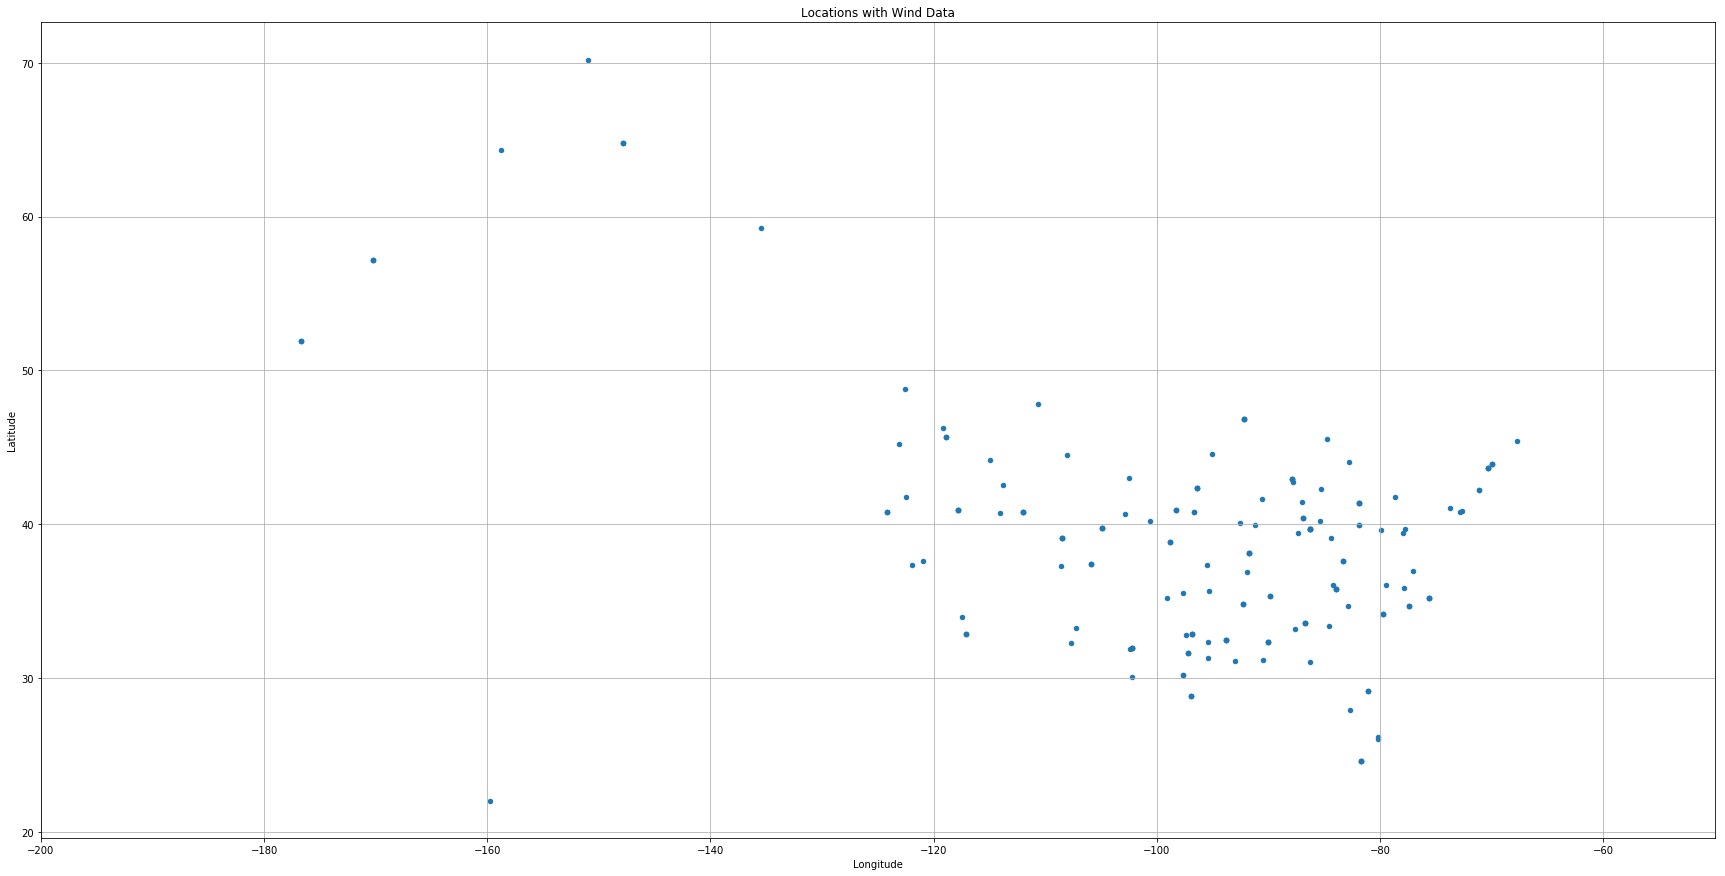

In [35]:
# Plot all stations with wind data
df.plot(kind="scatter", x='Longitude', y='Latitude', grid = True,
       figsize = (30,15), title="Locations with Wind Data")
plt.xlim(-200,-50)
plt.savefig('Locations with Wind Data.png')
plt.show()

# Find locations with optimal wind speed

In [36]:
# AWND: Average daily wind speed (tenths of meters per second)
# PSUN: Daily percent of possible sunshine (percent)
# ACMH: Average cloudiness midnight to midnight from manual observations (percent)
# ACSH: Average cloudiness sunrise to sunset from manual observations (percent)
# ACMC: Average cloudiness midnight to midnight from 30-second ceilometer data (percent)
# ACSC: Average cloudiness sunrise to sunset from 30-second ceilometer data (percent)
data['Element'].unique()

array(['AWND', 'ACMH', 'ACSH', 'PSUN', 'ACMC', 'ACSC'], dtype=object)

In [37]:
# Cut in speed is 3.5 m/s, the typical cut-in speed, when a small turbine starts generating power.
# Convert wind speed to tenths of m/s
cut_in_wind = 35

# Locations that wind can generate power.
suitable_winds = df.loc[(df['Element']=='AWND') & (df['Value']>= cut_in_wind),:]
suitable_winds.to_csv('Suitable_Wind.csv', index = False)
suitable_winds.describe()

,Value,Latitude,Longitude,Elevation
count,49.000000,49.000000,49.000000,49.000000
mean,43.024051,39.113580,-98.916780,413.528571
std,7.002192,8.532928,21.330592,443.236400
min,35.184210,24.583300,-176.650000,1.800000
25%,38.197395,32.819200,-102.386700,134.100000
50%,41.172192,40.097200,-96.855600,234.700000
75%,45.043493,42.391400,-87.005800,568.100000
max,69.846482,70.211700,-70.300300,1611.200000


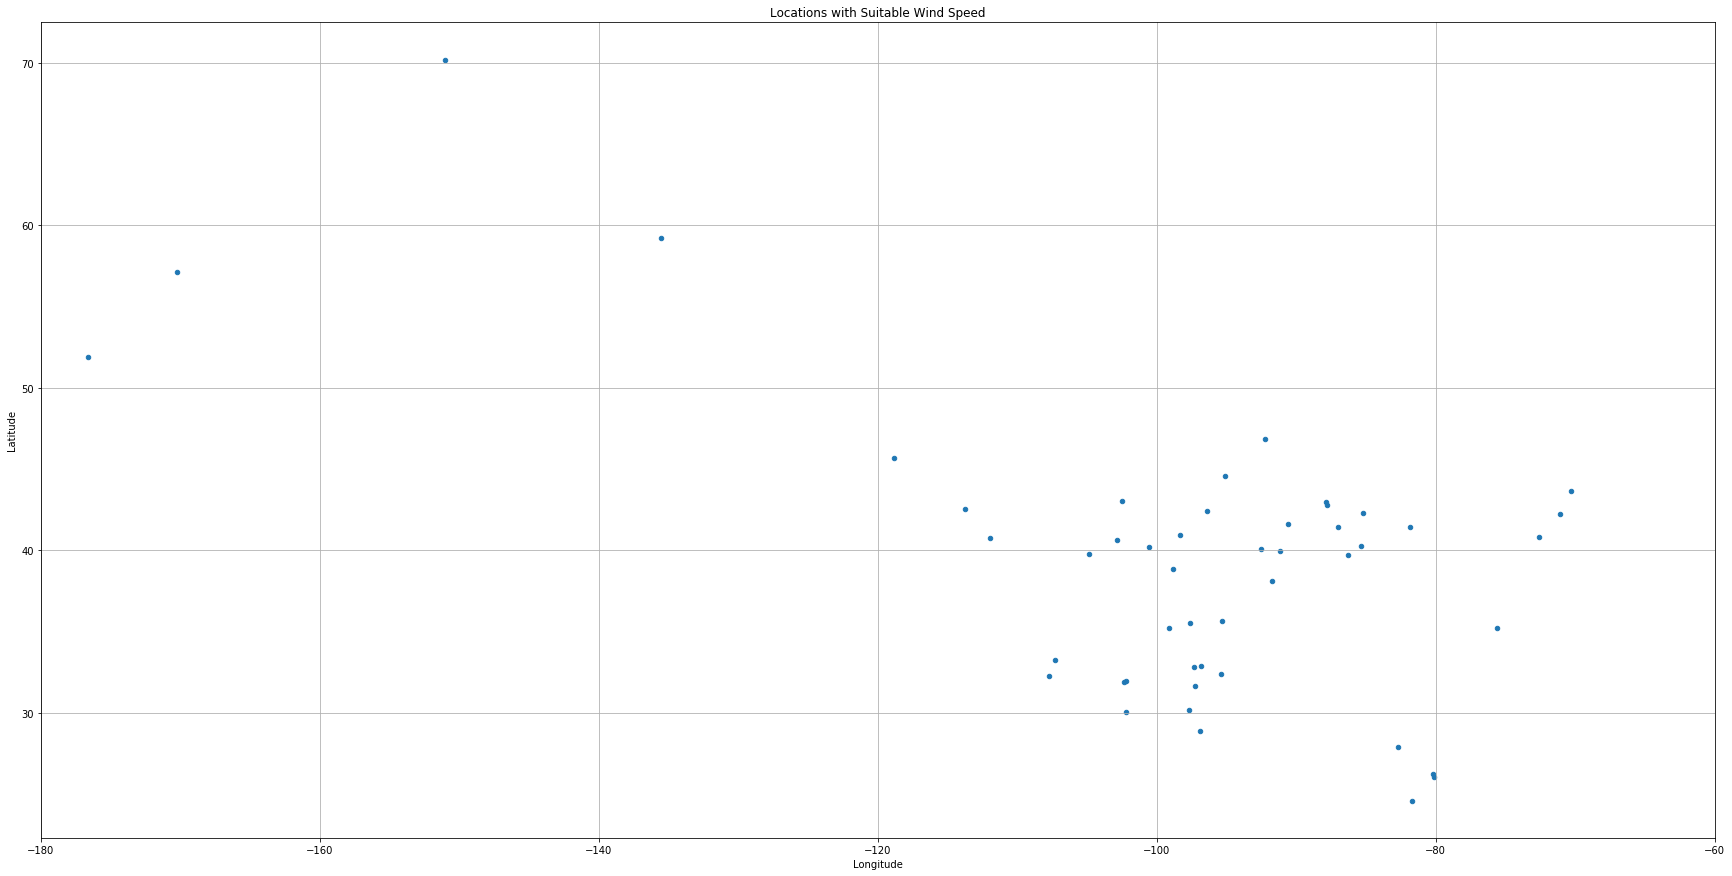

In [38]:
# Plot all stations with suitable wind speed data
suitable_winds.plot(kind="scatter", x='Longitude', y='Latitude', grid = True,
       figsize = (30,15), title="Locations with Suitable Wind Speed")
plt.xlim(-180,-60)
plt.savefig('Locations with Suitable Wind Speed.png')
plt.show()

In [39]:
# Optimal wind speed: 10–15 m/s, 36–54 kph (10–15 m/s) produces maximum generation power.
# Convert wind speed to tenths of m/s
optimal_wind = 100

# Locations with optimal wind to generate power.
optimal_winds = df.loc[(df['Element']=='AWND') & (df['Value']>= optimal_wind),:]
optimal_winds

,ID,Element,State,Value,Latitude,Longitude,Elevation


## Map Location to Google Map

In [40]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [41]:
locations = suitable_winds[['Latitude','Longitude']].astype(float)
wind_speed = suitable_winds['Value'].astype(float)

In [42]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=wind_speed, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 0
heat_layer.point_radius = 0.5

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
suitable_winds.head()

,ID,Element,State,Value,Latitude,Longitude,Elevation
0,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2
4,USW00003031,AWND,TX,46.546280,31.9206,-102.3867,914.7
5,USW00003032,AWND,TX,40.748063,30.0481,-102.2131,707.7
11,USW00003932,AWND,OK,57.636309,35.2100,-99.1200,585.8
19,USW00003954,AWND,OK,52.641088,35.5342,-97.6469,395.3


In [44]:
# Create list of suitable states
states_df = suitable_winds['State'].value_counts()
states_df = states_df.reset_index()
#headers = ['State', 'Counts']
#states_df = states_df[headers]
states_df = states_df.rename(columns={'State':'Counts'})
states_df = states_df.rename(columns={'index':'State'})
states_df.head()

,State,Counts
0,TX,9
1,FL,4
2,AK,4
3,IN,3
4,OK,3


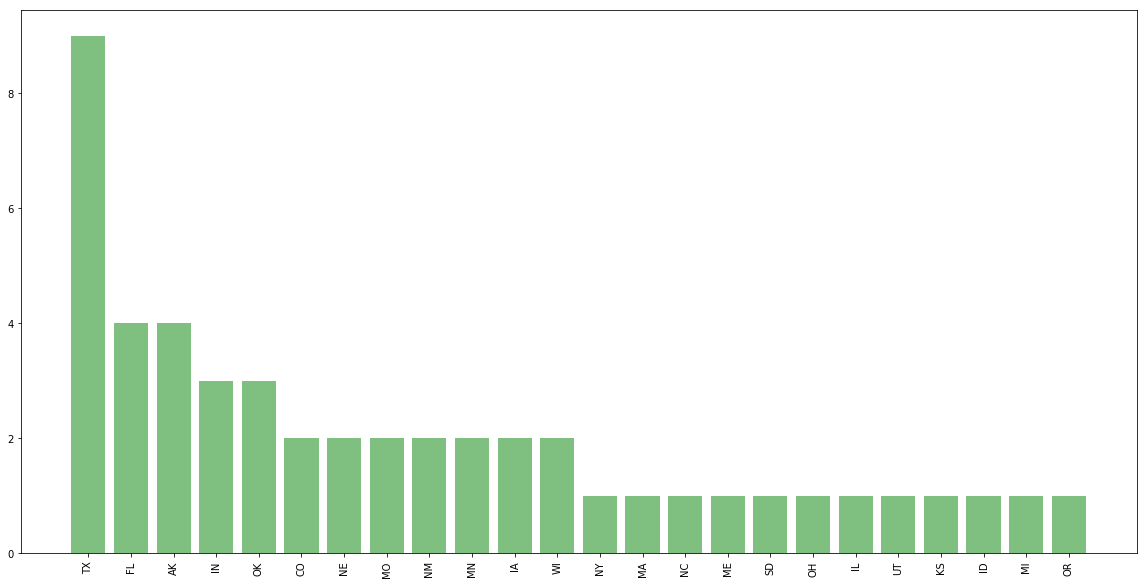

In [45]:
xAxis = np.arange(len(states_df['State']))
xAxis.tolist()
tick_locations = [value + 0.4 for value in xAxis]

#Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(xAxis, states_df["Counts"], color='green', alpha=0.5, align="edge")
plt.xticks(tick_locations, states_df["State"], rotation="vertical")
plt.savefig('States with Suitable Wind Spee.png')